C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


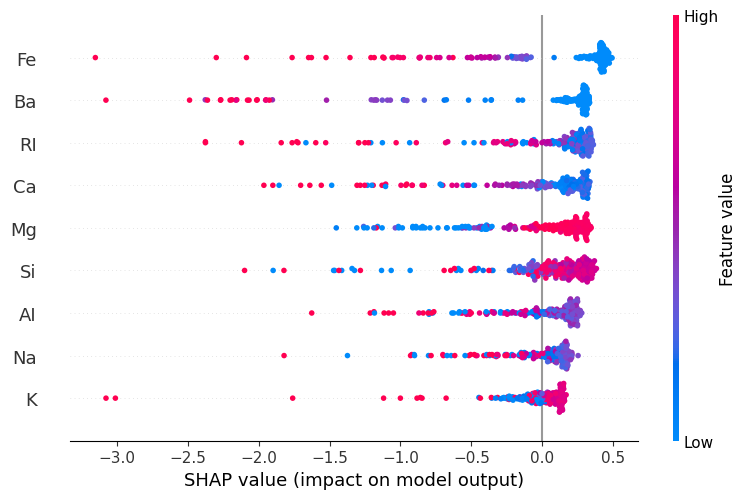

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import shap
from sklearn.preprocessing import StandardScaler

# 加载数据
data = pd.read_csv('glass.csv')  # 修改为实际文件路径

# 使用孤立森林模型进行异常检测
isolation_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest.fit(data)

# 初始化SHAP解释器
explainer = shap.Explainer(isolation_forest, data)

# 计算SHAP值
shap_values = explainer(data)

# 可视化特征重要性
shap.summary_plot(shap_values.values, data, feature_names=data.columns)


In [2]:
scaler = StandardScaler()
glass_scaled = scaler.fit_transform(data)

In [3]:
glass_scaled

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

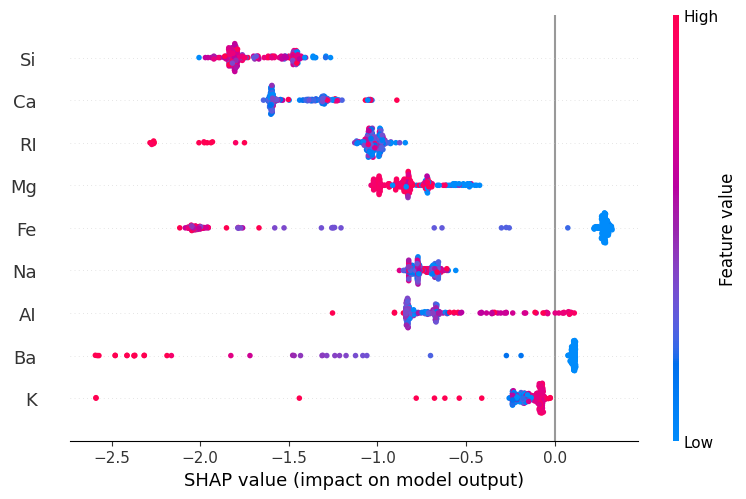

In [4]:

isolation_forest2 = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
isolation_forest2.fit(glass_scaled)


explainer2 = shap.Explainer(isolation_forest, glass_scaled)


shap_values2 = explainer(glass_scaled)


shap.summary_plot(shap_values2.values, glass_scaled, feature_names=data.columns)


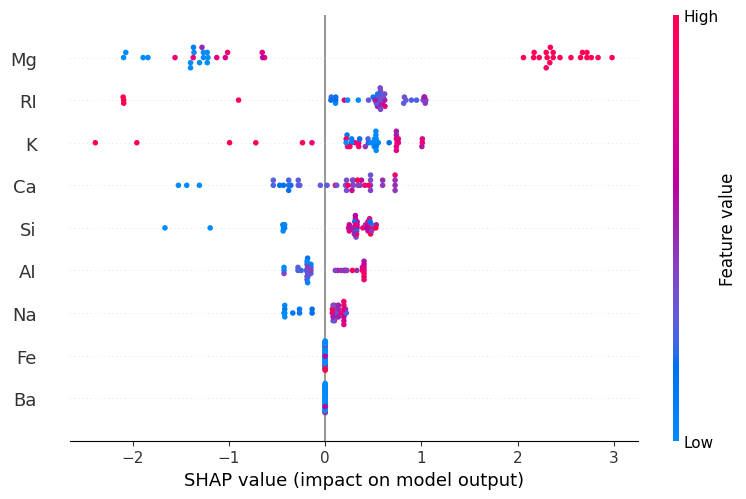

PermissionError: [WinError 5] 拒绝访问。

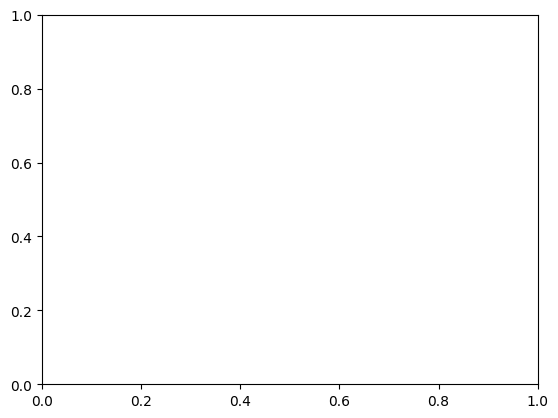

In [5]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
import shap
from sklearn.ensemble import IsolationForest


iso_forest = IsolationForest(n_estimators=100, contamination='auto', random_state=42)
labels = iso_forest.fit_predict(data)
labels = (labels == 1).astype(int)  # 转换为二分类标签，1为正常，0为异常


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)


model = xgb.XGBClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)


explainer = shap.Explainer(model)
shap_values = explainer(X_test)


shap.summary_plot(shap_values, X_test)

# Visualize one of the decision trees
xgb.plot_tree(model, num_trees=3)  # num_trees参数选择可视化哪一棵树


The probability of this decision tree needs further calculation to get the corresponding classification

In [6]:
## This force looks at a single sample and makes little sense
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
import shap


data = pd.read_csv('breastw.csv')


isolation_forest = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
anomalies = isolation_forest.fit_predict(data)
data['anomaly'] = anomalies


X_train, X_test, y_train, y_test = train_test_split(data.drop('anomaly', axis=1), data['anomaly'], test_size=0.3, random_state=42)


model = IsolationForest(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)


shap.initjs()  
force_plot = shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
shap.save_html('force_plot.html', force_plot)  
